---
# Ejercicio 12
Escriba un programa que calcule el número de eventos y sus tiempos de arribo en las primeras
$T$ unidades de tiempo de un proceso de Poisson homogéneo con parámetro $λ$

In [3]:
from random import random
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import log, e, pi, cos, sin, sqrt
sns.set_theme(style="darkgrid")

In [26]:
def Poisson_events(lamda:float, T:float) -> tuple[int, float]:
    """
        Calcula el número de eventos y sus tiempos de arribo
    en las primeras T unidades de tiempo.

    Args:
        T (float): Cota hasta donde se calculan el numero
        de eventos y tiempos de arribo

    Returns:
        tuple[float, float]: Tupla con el número de eventos ocurridos
        y tiempos entre los arribos.
    """
    t = 0
    NT = 0
    arrival_times = []
    while t < T:
        U = 1 - random()
        t += -log(U) / lamda
        if t <= T:
            NT += 1
            arrival_times.append(t)
    return (NT, arrival_times)


In [96]:
def graphic_Poisson_events(T: float, NT: int, arrival_times: list[float]):
    pallete = sns.color_palette("magma")
    plt.figure(figsize=(15, 3))
    plt.hlines(y=0, xmin=0, xmax=T, color=pallete[0], linewidth=1)
    plt.scatter(arrival_times, np.zeros_like(arrival_times), color=pallete[1], zorder=5, label="Arribos")
    plt.annotate('', xy=(T + 0.2, 0), xytext=(T, 0),
                 arrowprops=dict(arrowstyle="->", color=pallete[0], lw=1.5)) #Flechita linda
    plt.scatter(x=int(T), y=0, color=pallete[3], label="T", zorder=6)


    units = np.arange(1, int(T) + 1)
    plt.scatter(units, np.zeros_like(units), color='black', marker='|', label="Unidades")

    xticks = np.unique(np.concatenate([units, np.round(arrival_times, 2)]))
    plt.xticks(xticks, rotation=45, fontsize=10)

    plt.ylim(-0.1, 0.1)
    plt.xlim(0, T + 0.5)
    plt.title(f"Eventos con sus tiempos de arribo hasta el tiempo {T}")
    plt.xlabel("Tiempos de arribo")
    plt.yticks([])
    plt.legend()
    plt.tight_layout()
    plt.show()

🔢📦 CANTIDAD DE EVENTOS:3
⏱️📥 TIEMPOS DE ARRIBO:[0.7888453173940964, 0.8070484326953529, 1.2454929291315606]


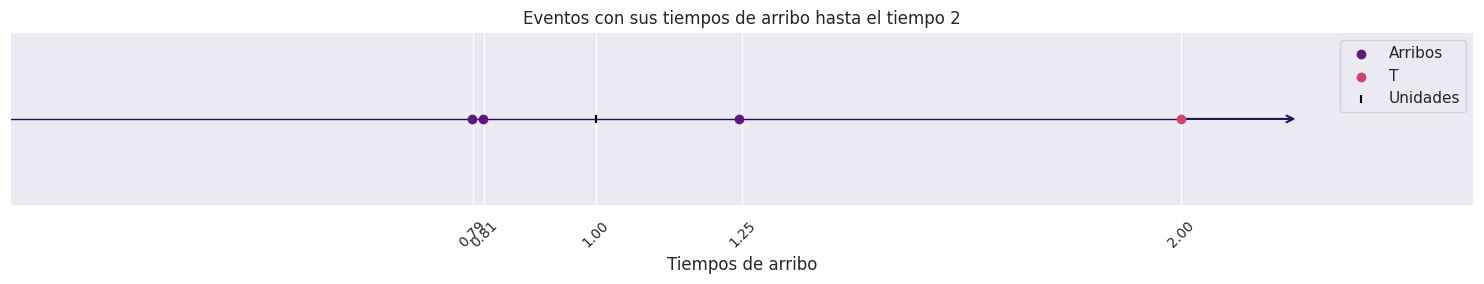

In [97]:
T= 2
NT, arrival_times = Poisson_events(lamda=1, T=T)
print(f"🔢📦 CANTIDAD DE EVENTOS:{NT}")
print(f"⏱️📥 TIEMPOS DE ARRIBO:{arrival_times}")

graphic_Poisson_events(T=T, NT=NT, arrival_times=arrival_times)
